# Analyse des résultats OpusFilter

Ce notebook charge le CSV de résultats de benchmark, affiche les résultats et propose plusieurs visualisations utiles pour l'analyse des filtres.

In [2]:
# 1. Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# (Optionnel, pour un style plus joli)
sns.set_theme(style="whitegrid")

## Charger le fichier de résultats

In [12]:
csv_path = "/mnt/c/Users/soumia.daas/ar_fr_filter/filter-benchmark-align/all_benchmark_results.csv"

df = pd.read_csv(csv_path)

display(df)

,Filtres,VP,FP,FN,VN,Précision,Rappel,F1,Benchmark
0,LengthRatioFilter_2.0_TerminalPunctuationFilte...,44,0,6,0,1.0,0.880,0.936,fr_ar_base
1,LengthRatioFilter_2.0_TerminalPunctuationFilte...,44,0,6,0,1.0,0.880,0.936,fr_ar_base_disaligned
2,LengthRatioFilter_2.0_TerminalPunctuationFilte...,1008,0,232,0,1.0,0.813,0.897,fr_ar
3,LengthRatioFilter_3.0_TerminalPunctuationFilte...,738,0,18,0,1.0,0.976,0.988,ar_ar_TN
4,LengthRatioFilter_2.0_TerminalPunctuationFilte...,737,0,503,0,1.0,0.594,0.746,fr_ar_disaligned
5,LengthRatioFilter_3.0_TerminalPunctuationFilte...,405,0,351,0,1.0,0.536,0.698,ar_ar_TN_disaligned


## Statistiques générales

In [4]:
display(df.describe())

,VP,FP,FN,VN,Précision,Rappel,F1
count,6.000000,6.0,6.000000,6.0,6.0,6.000000,6.000000
mean,496.000000,0.0,186.000000,0.0,1.0,0.779833,0.866833
std,398.918037,0.0,211.117976,0.0,0.0,0.175292,0.116846
min,44.000000,0.0,6.000000,0.0,1.0,0.536000,0.698000
25%,134.250000,0.0,9.000000,0.0,1.0,0.648750,0.783750
50%,571.000000,0.0,125.000000,0.0,1.0,0.846500,0.916500
75%,737.750000,0.0,321.250000,0.0,1.0,0.880000,0.936000
max,1008.000000,0.0,503.000000,0.0,1.0,0.976000,0.988000


## Visualisation : Score F1 par benchmark

/tmp/ipykernel_22770/1055955616.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Benchmark", y="F1", data=df, ci=None)


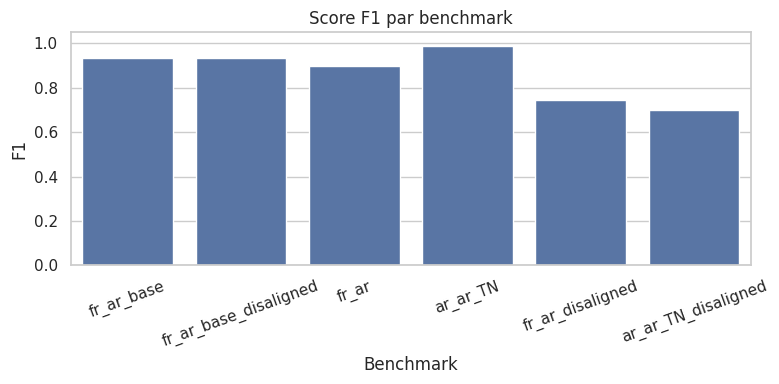

In [11]:
plt.figure(figsize=(8, 4))
sns.barplot(x="Benchmark", y="F1", data=df, ci=None)
plt.title("Score F1 par benchmark")
plt.ylim(0, 1.05)
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

## Visualisation : Score F1 par combinaison de filtres

/tmp/ipykernel_22770/83121942.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
/tmp/ipykernel_22770/83121942.py:9: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


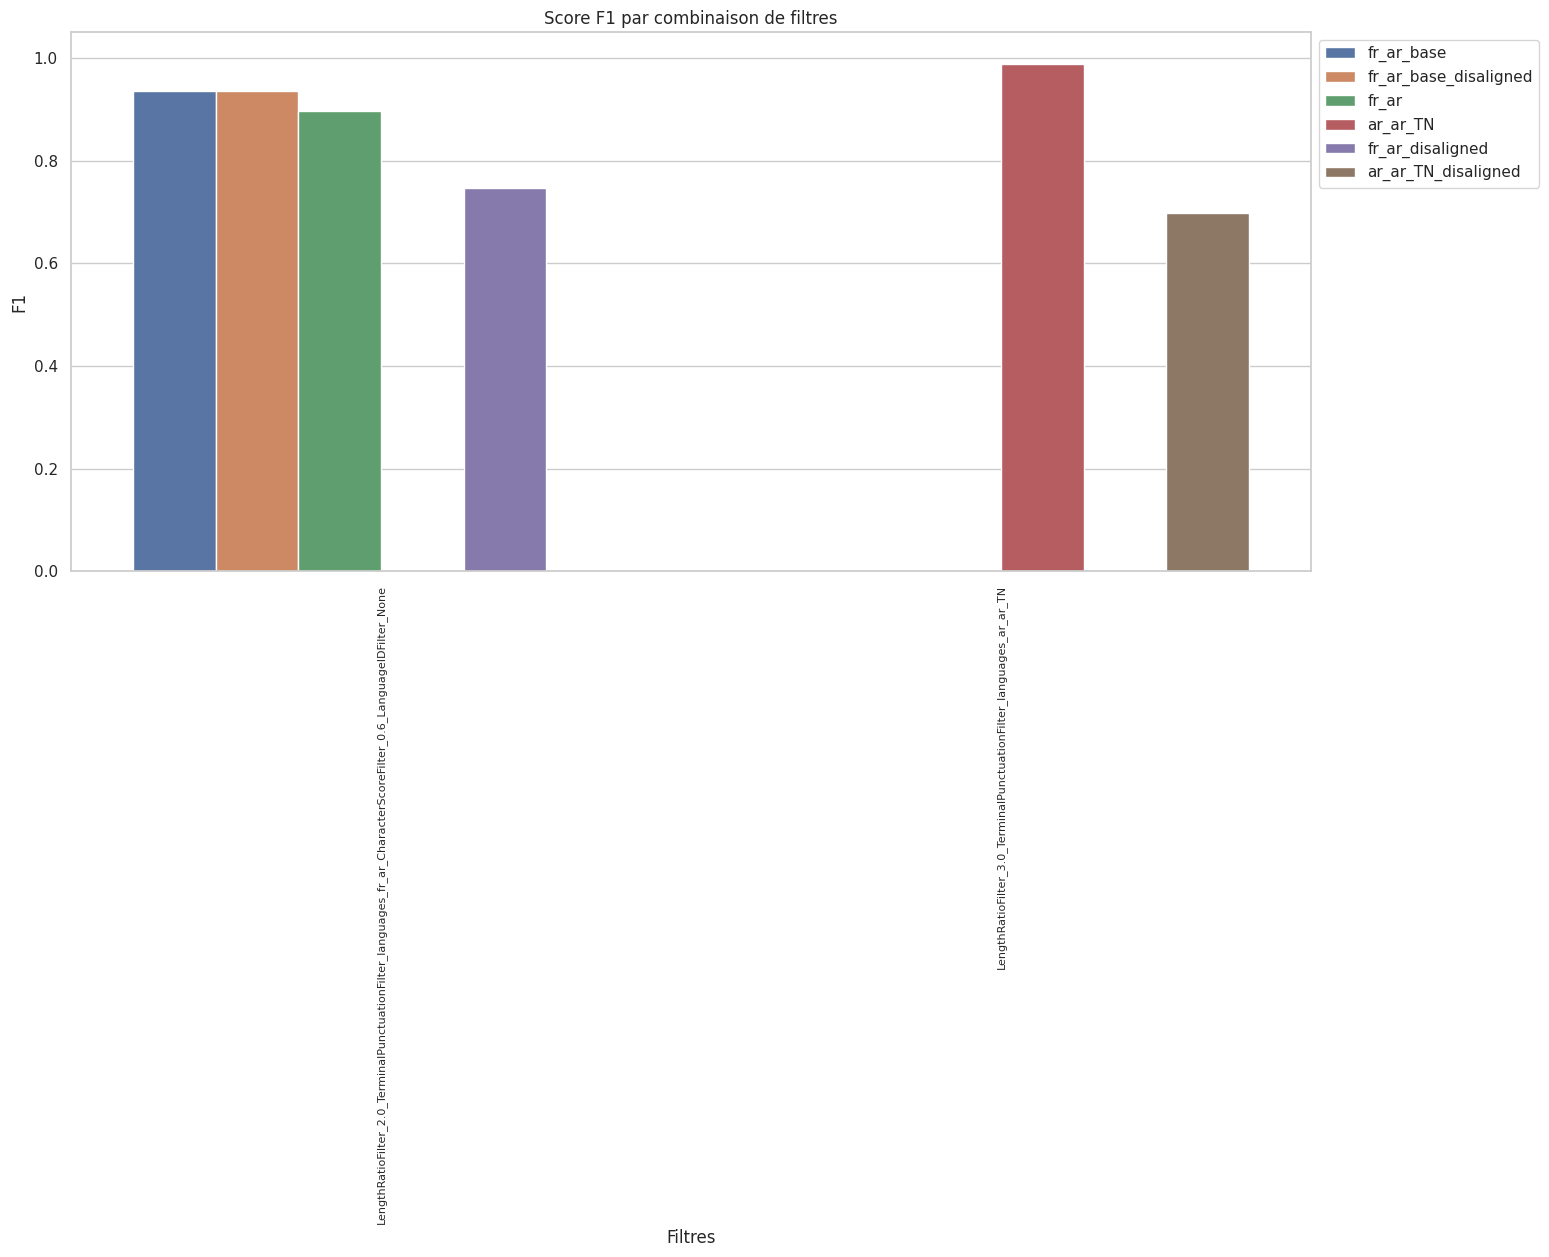

In [18]:
plt.figure(figsize=(16, 7))
sns.barplot(
    x="Filtres", y="F1", hue="Benchmark", data=df, ci=None
)
plt.title("Score F1 par combinaison de filtres")
plt.ylim(0, 1.05)
plt.xticks(rotation=90, fontsize=8)
plt.legend(bbox_to_anchor=(1,1))
plt.tight_layout()
plt.show()

## Précision et rappel pour chaque benchmark

/tmp/ipykernel_22770/1148958156.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Benchmark", y="Précision", data=df, ax=ax[0], ci=None)
/tmp/ipykernel_22770/1148958156.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Benchmark", y="Rappel", data=df, ax=ax[1], ci=None)


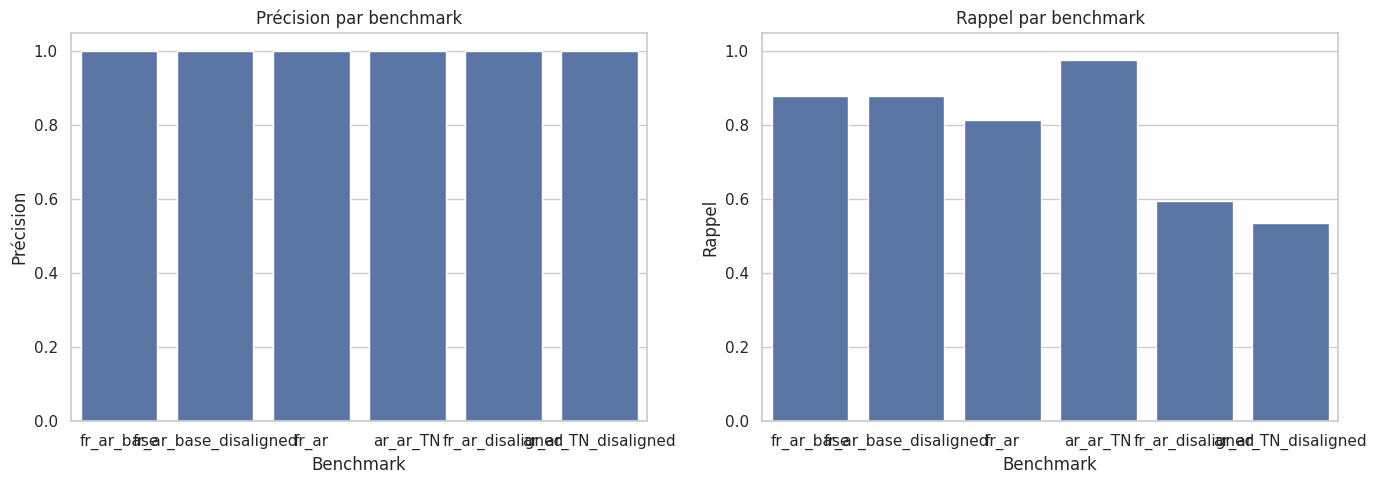

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

sns.barplot(x="Benchmark", y="Précision", data=df, ax=ax[0], ci=None)
ax[0].set_title("Précision par benchmark")
ax[0].set_ylim(0, 1.05)

sns.barplot(x="Benchmark", y="Rappel", data=df, ax=ax[1], ci=None)
ax[1].set_title("Rappel par benchmark")
ax[1].set_ylim(0, 1.05)

plt.tight_layout()
plt.show()

## Top 5 des meilleures combinaisons de filtres (F1)

In [8]:
top5 = df.sort_values("F1", ascending=False).head(5)
display(top5)

,Filtres,VP,FP,FN,VN,Précision,Rappel,F1,Benchmark
3,LengthRatioFilter_3.0_TerminalPunctuationFilte...,738,0,18,0,1.0,0.976,0.988,ar_ar_TN
0,LengthRatioFilter_2.0_TerminalPunctuationFilte...,44,0,6,0,1.0,0.880,0.936,fr_ar_base
1,LengthRatioFilter_2.0_TerminalPunctuationFilte...,44,0,6,0,1.0,0.880,0.936,fr_ar_base_disaligned
2,LengthRatioFilter_2.0_TerminalPunctuationFilte...,1008,0,232,0,1.0,0.813,0.897,fr_ar
4,LengthRatioFilter_2.0_TerminalPunctuationFilte...,737,0,503,0,1.0,0.594,0.746,fr_ar_disaligned
